# imports

In [1]:
#imports
import warnings
warnings.simplefilter('ignore')
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import joblib
import pandas_ta as ta
from prophet import Prophet

In [2]:
def mape(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred) 
  return np.mean(np.abs((y_true - y_pred)/ y_true)) * 100

# variables

In [63]:
#Reading Data
df = pd.read_csv("C:\\Users\AmirHussain\Desktop\machine-Learning-tradert-bot-main\Datas\XAUUSDM15.csv" , 
                   encoding = 'utf-16', 
                   names =  ['ds', 'y', 'High', 'Low', 'Close', 'Volume', '0'] )

df.drop(['0', 'Volume'], inplace= True, axis= 1)
df['ds'] = pd.to_datetime(df['ds'])



In [64]:
# df.set_index('ds', drop=True, inplace = True)

In [65]:
def pivot_point( df) :
  pivot_points = []

  for _, row in df.iterrows():
      high = row['High']
      low = row['Low']
      close = row['Close']

      pivot_point = (high + low + close) / 3

      pivot_points.append(round(pivot_point, 2))

  return pivot_points

In [67]:
df['ma 1'] = ta.ma('sma', df['y'], length = 5)
df['ma 2'] = ta.ma('sma', df['y'], length = 10)
df['Pivot'] = pivot_point(df)
df['target'] = df['y'].shift(1)

In [68]:
df.head()

,ds,y,High,Low,Close,ma 1,ma 2,Pivot,target
0,2019-02-18 17:15:00,1325.95,1326.57,1325.83,1325.89,NaN,NaN,1326.10,NaN
1,2019-02-18 17:30:00,1325.93,1326.51,1325.87,1326.12,NaN,NaN,1326.17,1325.95
2,2019-02-18 17:45:00,1326.11,1326.38,1325.67,1325.90,NaN,NaN,1325.98,1325.93
3,2019-02-18 18:00:00,1325.86,1326.17,1325.47,1326.09,NaN,NaN,1325.91,1326.11
4,2019-02-18 18:15:00,1326.10,1326.48,1326.10,1326.38,1325.99,NaN,1326.32,1325.86


In [69]:
data = df[["ds", "y" ,"Pivot","ma 1", 'ma 2', "target" ]]
data.head()

,ds,y,Pivot,ma 1,ma 2,target
0,2019-02-18 17:15:00,1325.95,1326.10,NaN,NaN,NaN
1,2019-02-18 17:30:00,1325.93,1326.17,NaN,NaN,1325.95
2,2019-02-18 17:45:00,1326.11,1325.98,NaN,NaN,1325.93
3,2019-02-18 18:00:00,1325.86,1325.91,NaN,NaN,1326.11
4,2019-02-18 18:15:00,1326.10,1326.32,1325.99,NaN,1325.86


In [70]:
data.dropna(inplace=True)

# split Data

In [71]:
X = data[ :70000 ] 
Y = data[ 70000:  ]

In [72]:
X

,ds,y,Pivot,ma 1,ma 2,target
9,2019-02-18 19:30:00,1326.11,1326.15,1326.156,1326.073,1326.00
10,2019-02-18 19:45:00,1326.11,1326.33,1326.096,1326.089,1326.11
11,2019-02-19 01:00:00,1326.12,1326.10,1326.046,1326.108,1326.11
12,2019-02-19 01:15:00,1326.26,1326.20,1326.120,1326.123,1326.12
13,2019-02-19 01:30:00,1326.20,1326.36,1326.160,1326.157,1326.26
...,...,...,...,...,...,...
70004,2022-02-14 21:30:00,1869.35,1869.41,1869.364,1866.407,1871.37
70005,2022-02-14 21:45:00,1869.28,1868.71,1869.690,1867.197,1869.35
70006,2022-02-14 22:00:00,1868.02,1870.75,1869.802,1867.830,1869.28
70007,2022-02-14 22:15:00,1871.97,1872.18,1869.998,1868.725,1868.02


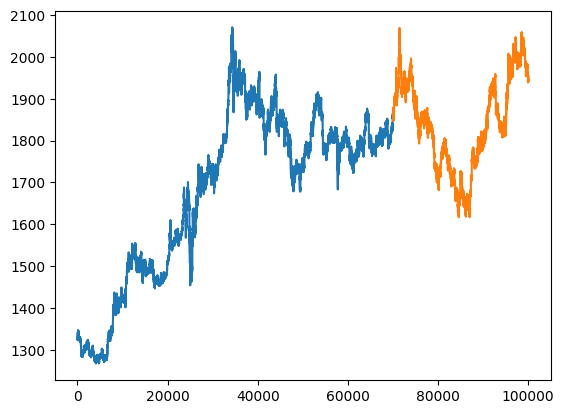

In [73]:
import matplotlib.pyplot as plt
plt.plot(X['y'], label = "y train")
plt.plot(Y['y'], label = 'y test')
plt.show()

In [144]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Input



nn_model = Sequential()
# nn_model.add(LSTM(1, input_shape=(1, 5)))
# nn_model.add(Dense(259, activation='linear'))
# nn_model.add(Dense(46, activation='linear'))
# nn_model.add(Dense(12, activation='linear'))

nn_model.add(Dense(1, activation='linear'))

# Compile the model with weighted loss
nn_model.compile(optimizer='adam', loss='mse', metrics=['mape'])


In [145]:
# Train the model with class weights
nn_model.fit(X['y'], X['target'], epochs=5, batch_size=32,  validation_split=0.3)

# Evaluate the model on the test set
loss, accuracy = nn_model.evaluate(Y['y'], Y['target'])
print(f"Loss:, {loss: .2%}")
print(f"Accuracy:, {accuracy: .2%}")

Epoch 1/5
1532/1532 [==============================] - 4s 2ms/step - loss: 23265.1602 - mape: 4.7372 - val_loss: 2.4916 - val_mape: 0.0546
Epoch 2/5
1532/1532 [==============================] - 4s 2ms/step - loss: 3.5442 - mape: 0.0686 - val_loss: 2.4916 - val_mape: 0.0546
Epoch 3/5
1532/1532 [==============================] - 3s 2ms/step - loss: 3.5453 - mape: 0.0686 - val_loss: 2.4916 - val_mape: 0.0546
Epoch 4/5
1532/1532 [==============================] - 4s 2ms/step - loss: 3.5508 - mape: 0.0687 - val_loss: 2.4936 - val_mape: 0.0546
Epoch 5/5
939/939 [==============================] - 2s 2ms/step - loss: 3.4584 - mape: 0.0661
Loss:,  345.84%
Accuracy:,  6.61%


In [146]:
pred = nn_model.predict(Y['y'])
pred[:,0]

939/939 [==============================] - 1s 1ms/step


array([1872.7219, 1871.6517, 1872.8918, ..., 1944.9022, 1945.4224,
       1946.1825], dtype=float32)

In [ ]:
import PyQt6
%matplotlib qt
plt.plot(Y['y'].to_numpy()[:100] , label = 'real' )
plt.plot(pred[:,0]        [:100] , label = 'pred' )

plt.legend()
plt.show(block=True)

In [158]:
joblib.dump ( nn_model,f"C:\\Users\\AmirHussain\\Desktop\\machine-Learning-tradert-bot-main\\Models\\test\\Neural regresion.h5")

['C:\\Users\\AmirHussain\\Desktop\\machine-Learning-tradert-bot-main\\Models\\test\\Neural regresion.h5']

In [59]:
prophet = Prophet(growth= "flat")
prophet.fit(X['y'])

ValueError: Dataframe must have columns "ds" and "y" with the dates and values respectively.

In [83]:
prophet = Prophet(growth= "linear")
prophet.fit(X)

00:17:50 - cmdstanpy - INFO - Chain [1] start processing
00:22:54 - cmdstanpy - INFO - Chain [1] done processing


In [84]:
y_pred = prophet.predict(Y)

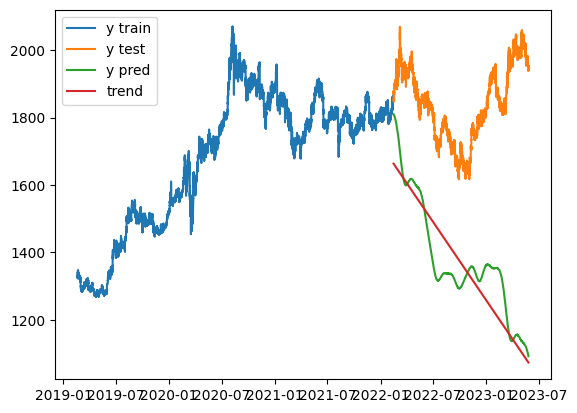

In [85]:
import matplotlib.pyplot as plt
plt.plot(X['ds'] ,X['y'], label = "y train")
plt.plot(Y['ds'] ,Y['y'], label = 'y test')

plt.plot(y_pred['ds'] ,y_pred['yhat'], label = 'y pred')


plt.plot(y_pred['ds']  ,y_pred["trend"], label = "trend")
plt.legend()
plt.show()

In [86]:
error = mape(Y['y'], y_pred['yhat'])
print(error)

24.916652729194617



# XGBOOST

In [87]:
import seaborn as sns 
import xgboost as xgb
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
# plt.style.use('fivethirtyeight')

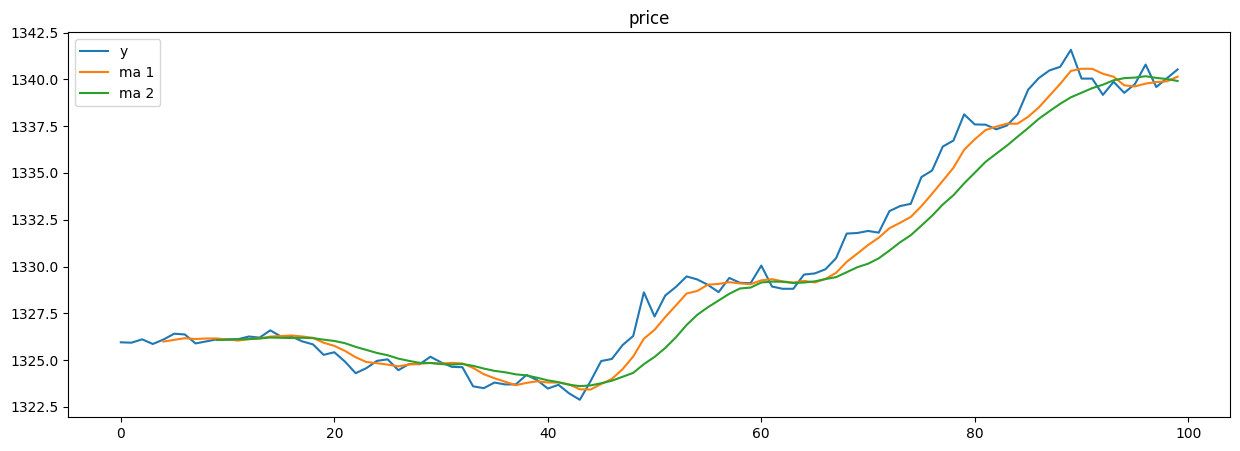

In [91]:
df [['y', 'ma 1', 'ma 2']][:100].plot(style='-',
    figsize= (15,5),
    color = color_pal,
    title= "price"      
        )
plt.show()

In [95]:

# Prepare data for training
from sklearn.model_selection import train_test_split


x = df['ds']
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle= False)


In [96]:
X_train, X_test, y_train, y_test

(0       2019-02-18 17:15:00
 1       2019-02-18 17:30:00
 2       2019-02-18 17:45:00
 3       2019-02-18 18:00:00
 4       2019-02-18 18:15:00
                 ...        
 80029   2022-07-20 04:00:00
 80030   2022-07-20 04:15:00
 80031   2022-07-20 04:30:00
 80032   2022-07-20 04:45:00
 80033   2022-07-20 05:00:00
 Name: ds, Length: 80034, dtype: datetime64[ns],
 80034    2022-07-20 05:15:00
 80035    2022-07-20 05:30:00
 80036    2022-07-20 05:45:00
 80037    2022-07-20 06:00:00
 80038    2022-07-20 06:15:00
                  ...        
 100038   2023-05-26 21:45:00
 100039   2023-05-26 22:00:00
 100040   2023-05-26 22:15:00
 100041   2023-05-26 22:30:00
 100042   2023-05-26 22:45:00
 Name: ds, Length: 20009, dtype: datetime64[ns],
 0        1325.95
 1        1325.93
 2        1326.11
 3        1325.86
 4        1326.10
           ...   
 80029    1711.99
 80030    1710.66
 80031    1710.90
 80032    1711.76
 80033    1709.73
 Name: y, Length: 80034, dtype: float64,
 80034     171

In [102]:
reg = xgb.XGBRegressor(base_score=0.5,
                       booster='gbtree',
                       n_estimators=500,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01,
                       enable_categorical = True)

# Train the model
reg.fit(X['ds'], X['y'],
        eval_set=[Y['ds'], Y['y']],
        verbose=100)

ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, The experimental DMatrix parameter`enable_categorical` must be set to `True`. 

In [37]:
y_pred = reg.predict(X_test)

In [38]:
err = mape(y_test, y_pred)
print(err)

0.6563630079954658


In [45]:
y_test

ds
2022-06-13 23:15:00    1822.62
2022-09-07 14:00:00    1702.68
2019-03-11 08:45:00    1298.07
2021-12-14 19:15:00    1773.86
2020-06-02 07:30:00    1737.80
                        ...   
2023-01-24 01:45:00    1932.03
2022-12-14 03:00:00    1811.08
2021-03-17 09:45:00    1734.27
2020-09-14 19:15:00    1957.04
2019-08-06 20:45:00    1472.89
Name: Open, Length: 20009, dtype: float64

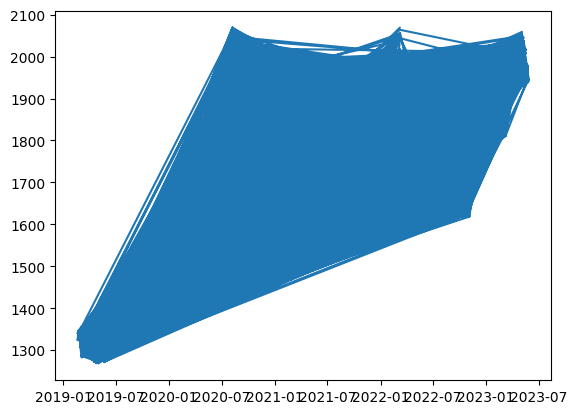

In [47]:
# plt.plot(X_train, y_train)
plt.plot(y_test)
# plt.scatter( y_test[:100].index,y_pred[:100] )
plt.show()

# The END